<font color='red'>linear regression from scratch</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading data

In [4]:
data = pd.read_csv(r"C:\ml\da\data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


<h1>preprossing</h1>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data.isnull().sum()

x    0
y    0
dtype: int64

<h1>splitting data</h1>

In [107]:
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)
#test data
test_input=np.array(data.x[500:699]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)


# linear regression

<h5>forward propogation

In [9]:
def forward(train_input,parameters):
    m=parameters['m']
    c=parameters['c']
    predictions=np.multiply(m,train_input)+c
    return predictions


<h weight='Bold'>cost function<h>

In [10]:
def cost_fun(prediction,train_output):
    cost=np.mean((prediction-train_output)**2)*0.5
    return cost

gradint desent

In [11]:
def backword(train_ouput,prediction,train_input):
    derivative=dict()
    df=(prediction-train_output)
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    derivative['m']=dm
    derivative['c']=dc
    return derivative
    

In [12]:
#update parameters

In [13]:
def update(parameters,derivatives,learning_rate):
    parameters['m']=parameters['m']-(learning_rate*derivatives['m'])
    parameters['c']=parameters['c']-(learning_rate*derivatives['c'])
    return parameters
    

In [14]:
def linear(train_input,train_output,iters,learning_rate):
    parameter=dict()
    parameter['m']=np.random.uniform(0,1)*-1
    parameter['c']=np.random.uniform(0,1)*-1
    plt.figure()
    loss=list()
    for i in range(iters):
        predictions=forward(train_input,parameter)
        cost=cost_fun(predictions,train_output)
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        derivatives=backword(train_output,predictions,train_input)
        parameter=update(parameter,derivatives,learning_rate)
        
        
    

Iteration = 1, Loss = 3337.3545485821637


<Figure size 640x480 with 0 Axes>

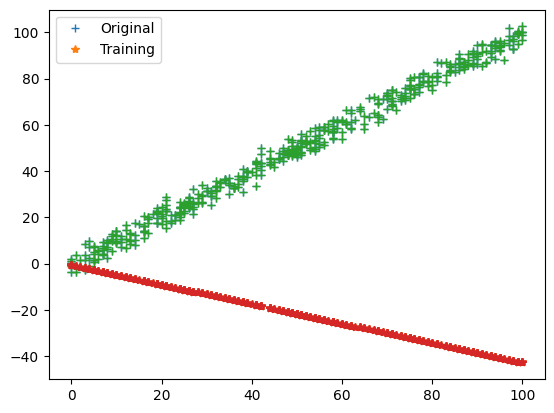

Iteration = 2, Loss = 1516.3153781879294


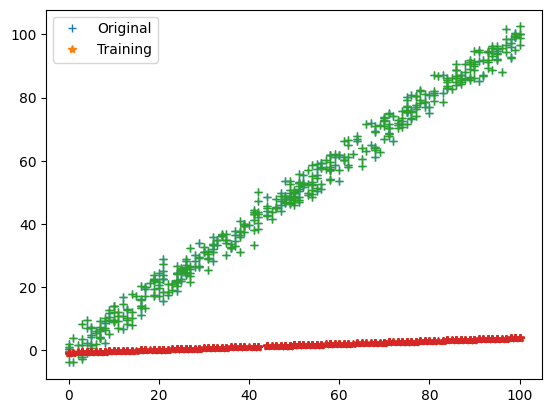

Iteration = 3, Loss = 690.1078886305509


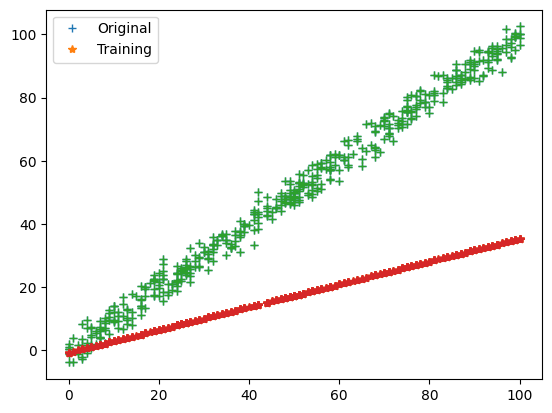

Iteration = 4, Loss = 315.2566345854695


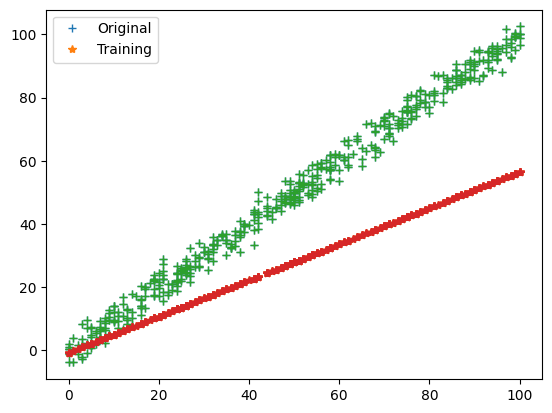

Iteration = 5, Loss = 145.18620453313102


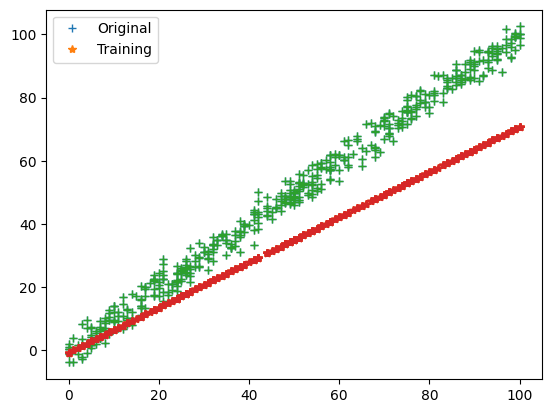

Iteration = 6, Loss = 68.02506115002528


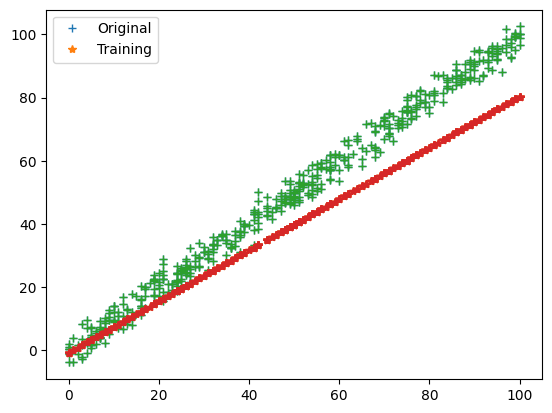

Iteration = 7, Loss = 33.01696403895055


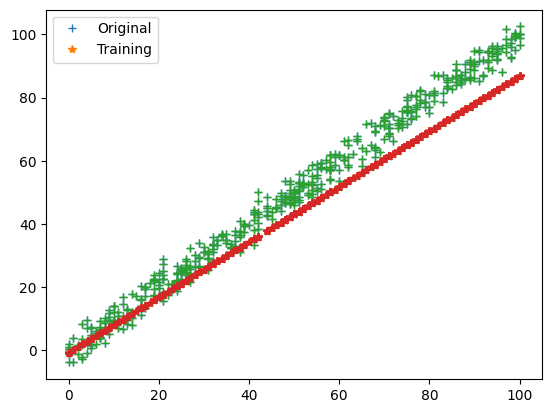

Iteration = 8, Loss = 17.13375071199246


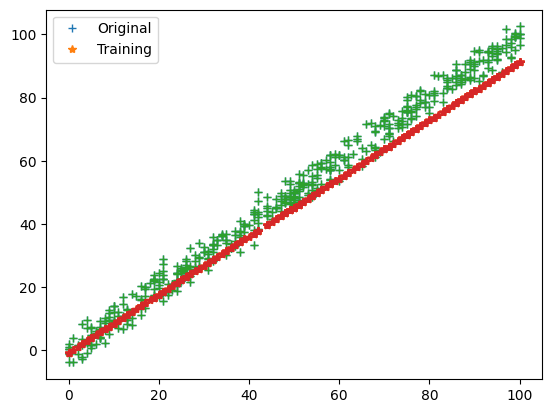

Iteration = 9, Loss = 9.927518341442523


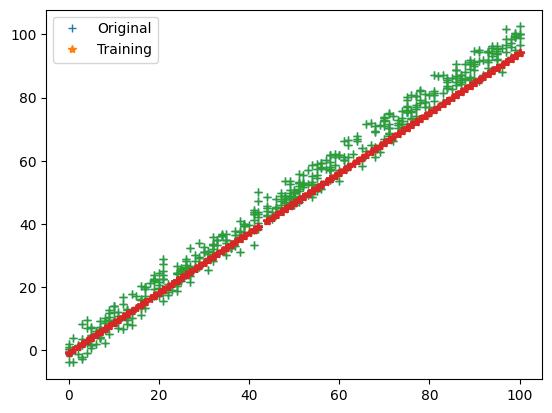

Iteration = 10, Loss = 6.658041841841579


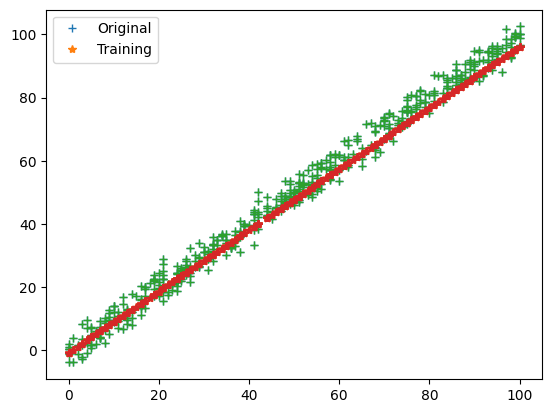

Iteration = 11, Loss = 5.174675841448141


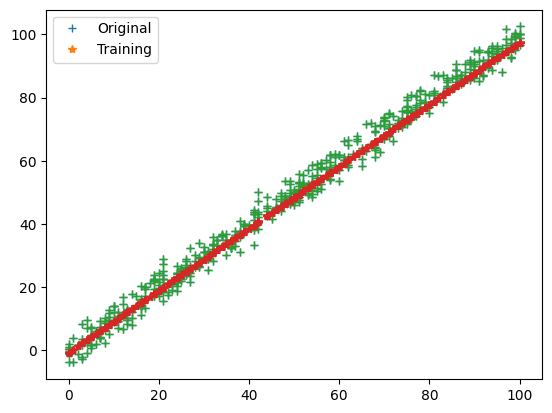

Iteration = 12, Loss = 4.501670152959628


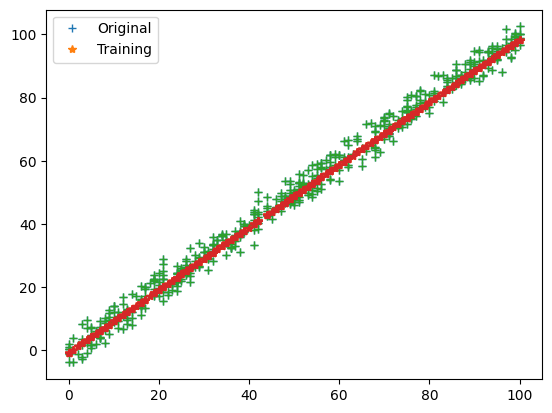

Iteration = 13, Loss = 4.196325835615757


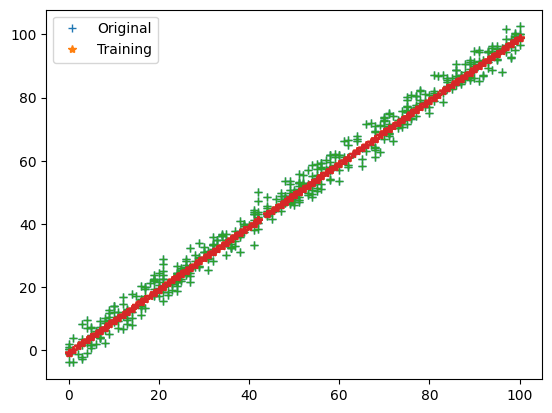

Iteration = 14, Loss = 4.057789889641965


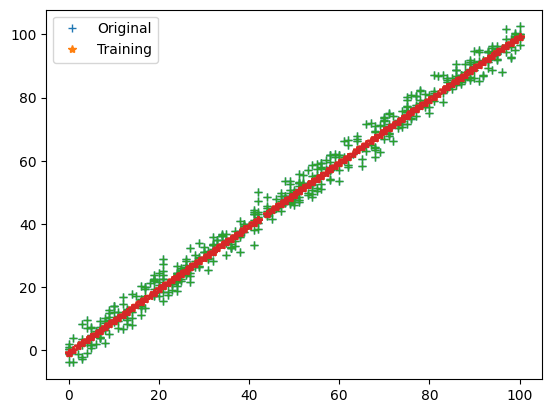

Iteration = 15, Loss = 3.9949350865674975


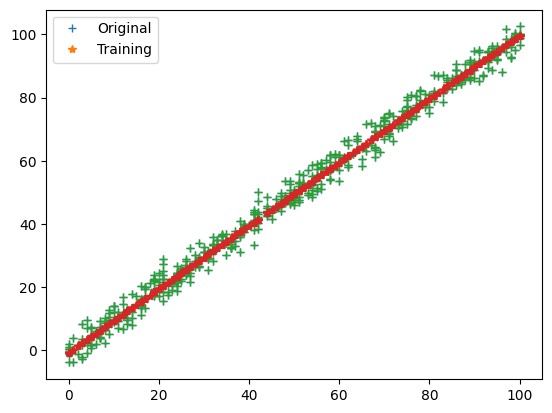

Iteration = 16, Loss = 3.966416901898885


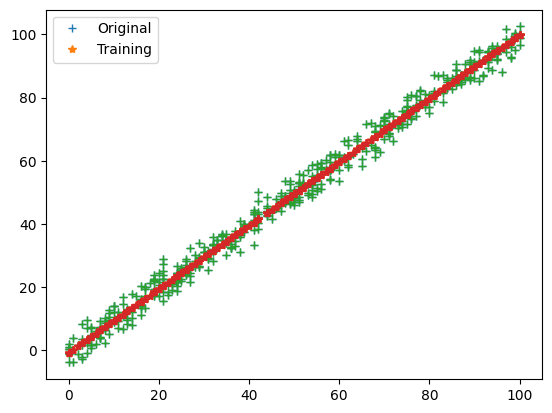

Iteration = 17, Loss = 3.95347727907854


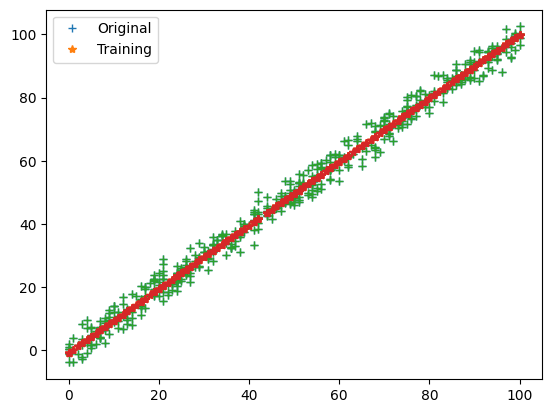

Iteration = 18, Loss = 3.9476056670690842


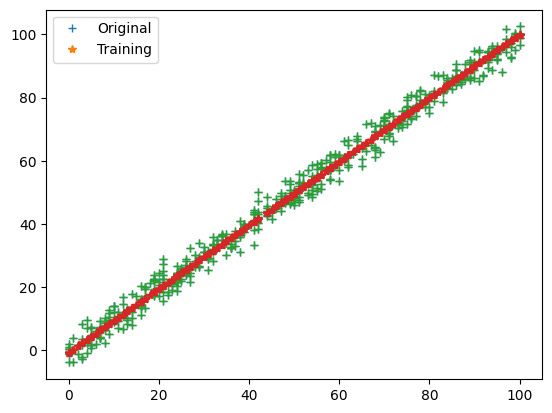

Iteration = 19, Loss = 3.9449408194382225


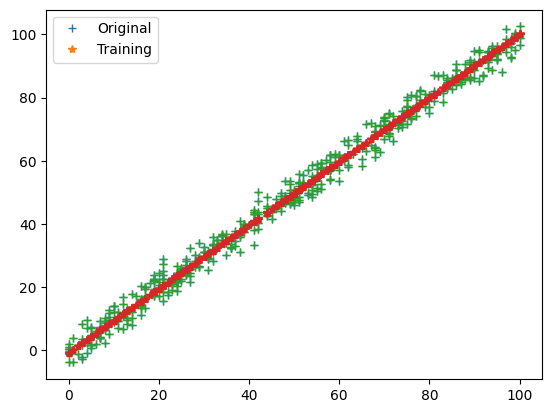

Iteration = 20, Loss = 3.943730884402744


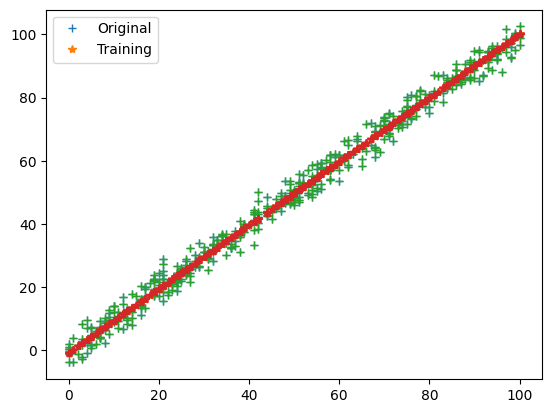

Iteration = 21, Loss = 3.94318104486818


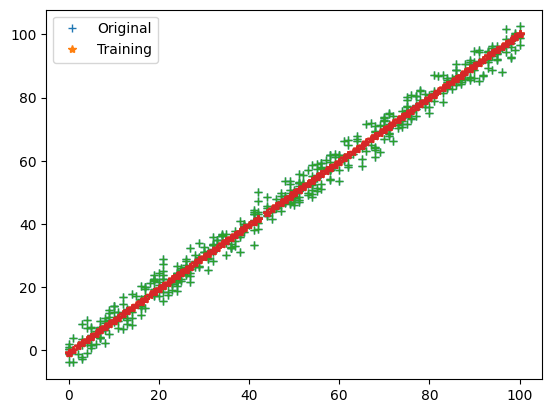

Iteration = 22, Loss = 3.942930691438396


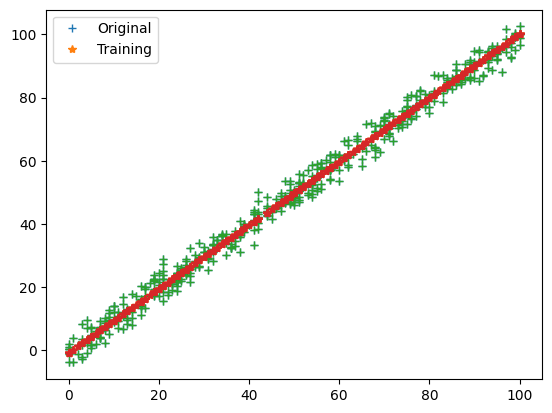

Iteration = 23, Loss = 3.942816215230936


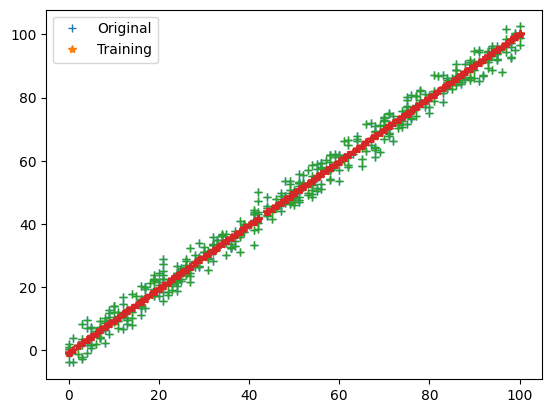

Iteration = 24, Loss = 3.9427633867146104


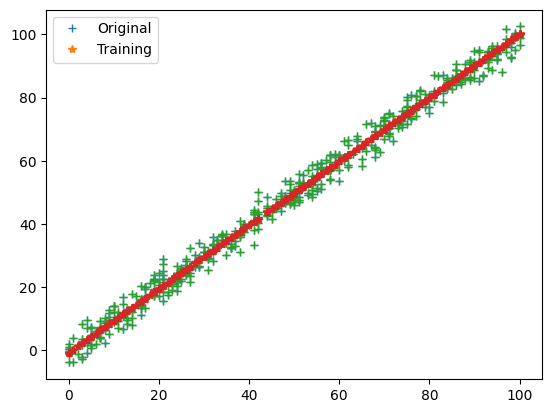

Iteration = 25, Loss = 3.9427385278688956


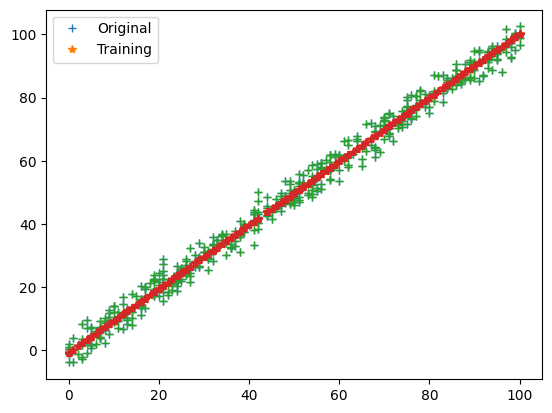

Iteration = 26, Loss = 3.942726358938573


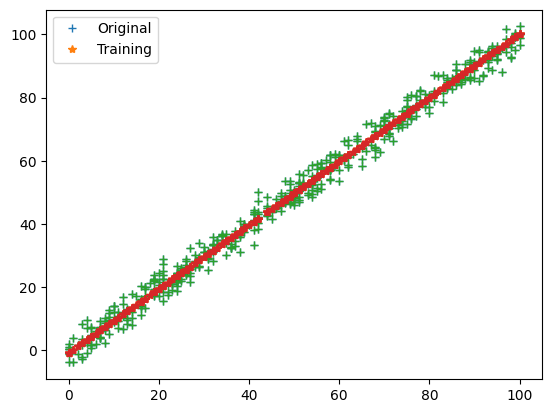

Iteration = 27, Loss = 3.9427199474817742


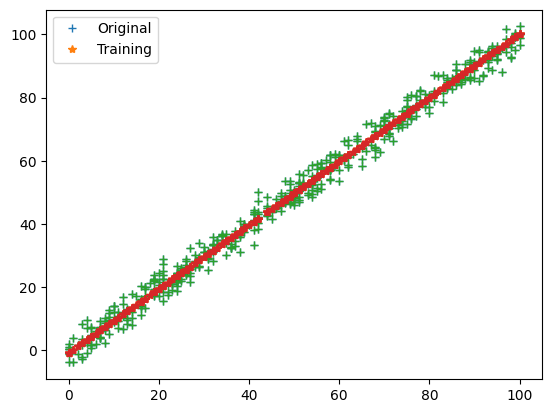

Iteration = 28, Loss = 3.9427161482419457


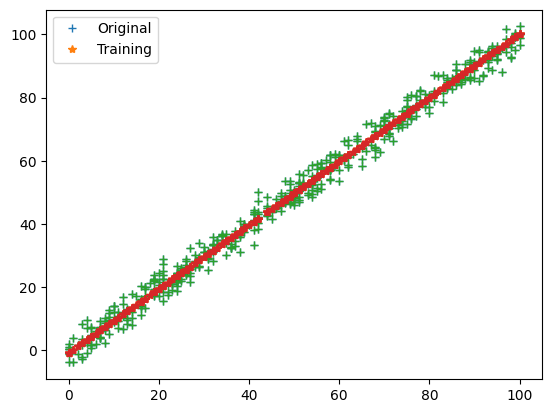

Iteration = 29, Loss = 3.9427135342126975


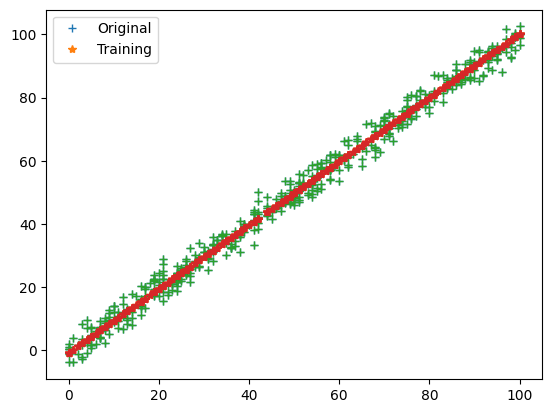

Iteration = 30, Loss = 3.9427114579596494


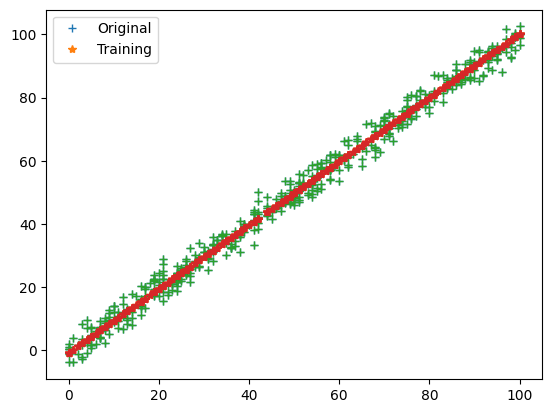

Iteration = 31, Loss = 3.9427096257411067


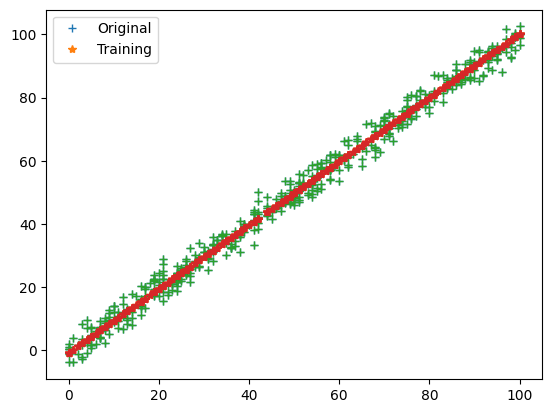

Iteration = 32, Loss = 3.9427079042861304


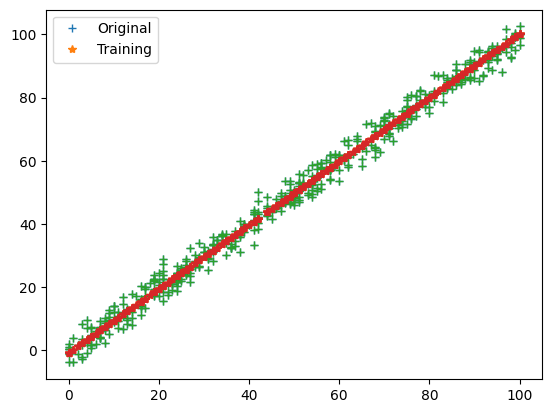

Iteration = 33, Loss = 3.94270623312955


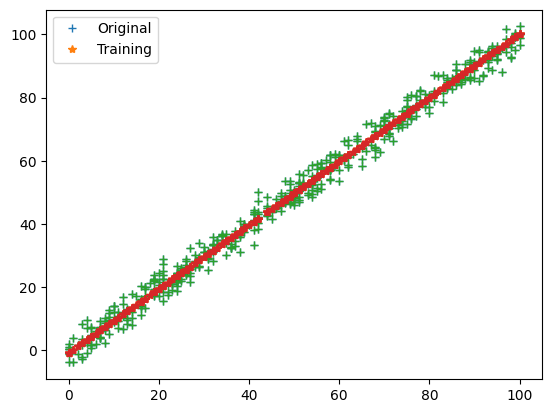

Iteration = 34, Loss = 3.9427045848382476


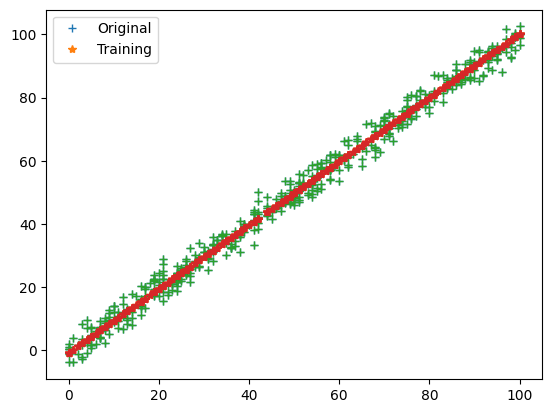

Iteration = 35, Loss = 3.9427029469657797


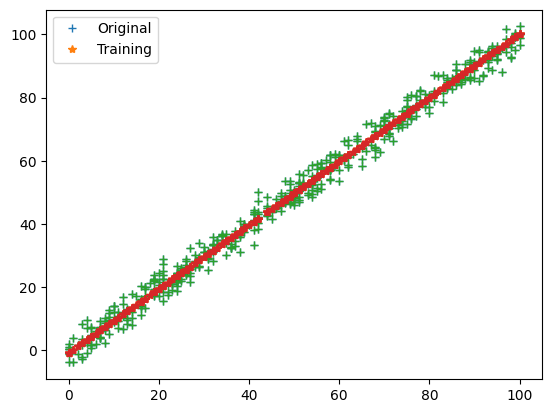

Iteration = 36, Loss = 3.9427013138651854


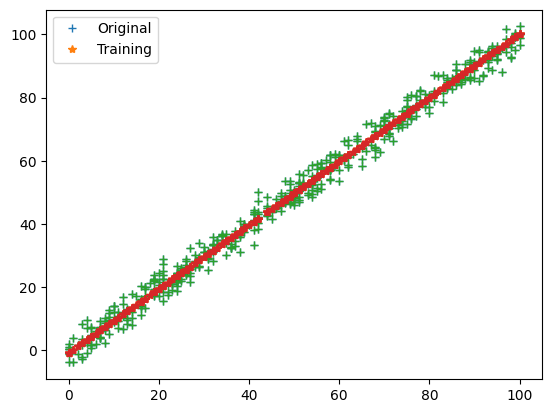

Iteration = 37, Loss = 3.9426996829744287


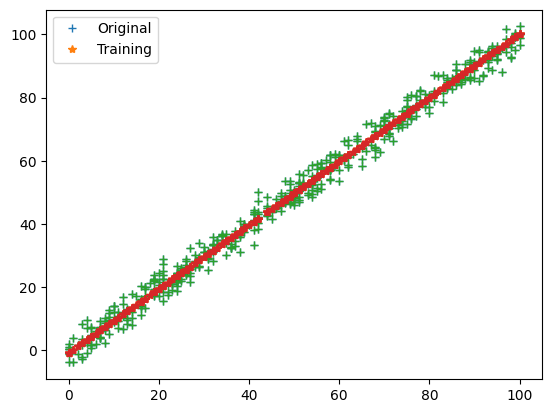

Iteration = 38, Loss = 3.9426980531311044


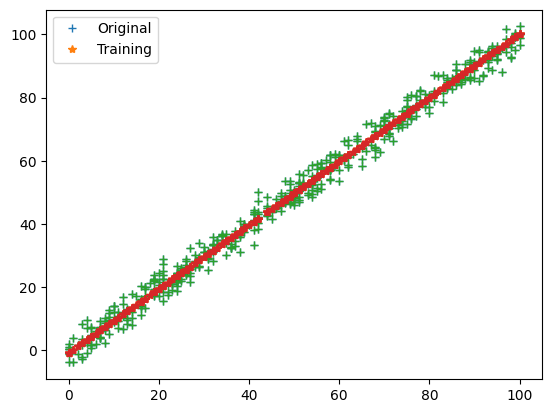

Iteration = 39, Loss = 3.9426964238078317


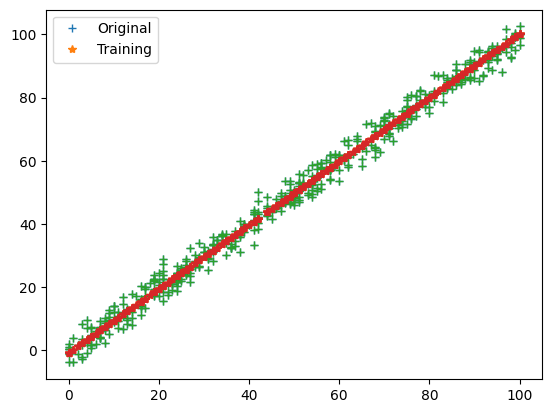

Iteration = 40, Loss = 3.9426947947653317


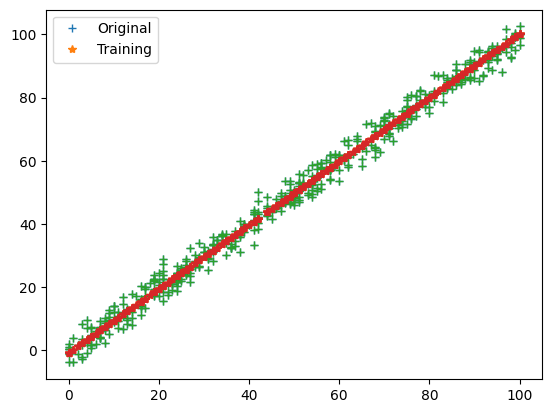

In [15]:
linear(train_input,train_output,40,0.0001)

<h1>train model</h1>

In [96]:
def train(train_input,train_output,iters,learning_rate):
    parameter=dict()
    parameter['m']=np.random.uniform(0,1)*-1
    parameter['c']=np.random.uniform(0,1)*-1
    parameter['cost']=0
    loss=list()
    for i in range(iters):
        
        predictions=forward(train_input,parameter)
        cost=cost_fun(predictions,train_output)
        parameter['cost']=cost
        loss.append(cost)
        derivative=backword(train_output,predictions,train_input)
        parameter=update(parameter,derivative,learning_rate)
        
    return parameter,loss
    

In [97]:
p,loss=train(train_input,train_output,40,0.0001)
p

{'m': 1.0008190959223404, 'c': -0.2241482368975414, 'cost': 3.910378103951272}

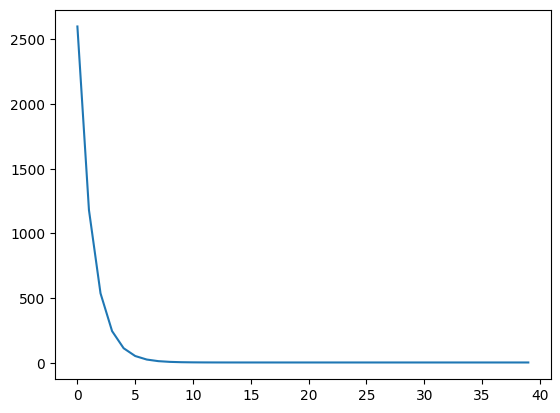

In [98]:
plt.plot(l)

<h1>prediction</h1>

In [103]:
prediction=forward(test_input,p)
c=cost_fun(prediction,test_output)
print(f"cost {c}")
pre=forward(50,p)
pre

cost 4.0137249212045685


49.81680655921948

# by skitlearn

In [112]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(train_input,train_output)
regressor.coef_

array([[1.0009993]])

In [116]:
regressor.intercept_

array([-0.23603461])

In [117]:
predicted_value = regressor.predict(test_input)

In [120]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(test_output, predicted_value)
cost

8.030031591835375

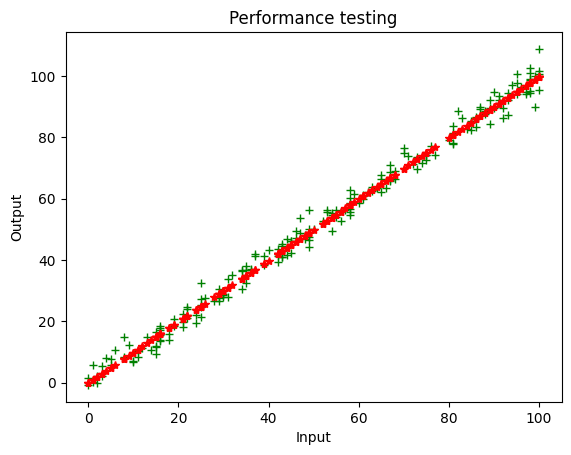

In [121]:
#visualization
plt.plot(test_input, test_output, '+', color = "green")
plt.plot(test_input, predicted_value, '*', color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()